# **Econometria: Fatores que impactam no nivel de renda**

FGV EPGE - Escola de Pós-Graduação em Economia
==
Trabalho de A1
--
Aluno: Diogo Sánchez, Giovanna Roncolli, Lucas Marques, Pedro Werneck, Valentina Araujo

# Introdução



Abaixo temos os principais pacotes que usaremos.

In [2]:
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output,display
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
clear_output(wait=True)

# Desenvolvimento

In [3]:
## Criação da base de addos

base=pd.DataFrame()


## Pegando dados de renda per capita
base=pd.read_csv("renda_percapita.csv",skiprows=1).iloc[:,0:5]
base.columns= ["Estado",'Código','Município','Renda per capita 1991','Renda per capita 2000']

    #Importante utilizar o Código como index ....
base.set_index("Código",inplace=True)



## Pegando coordenadas Geográficas
coords = pd.read_excel('coordenadas.xls')
coords.columns=['Código','Município','Longitude','Latitude']
coords.set_index("Código",inplace=True)

    #Juntando isso no dataframe principal
base= pd.merge(base, coords[['Longitude','Latitude']], left_index=True, right_index=True).dropna()




##Adicionando a váriavel: Distancia até São Paulo

    #Coordenadas até SP
long_sp, lat_sp = base[base['Município']=='São Paulo'][['Longitude','Latitude']].to_numpy()[0]

    #Distancia até SP
base['SP_kms'] = ( ((base['Longitude']-long_sp)**2 + (base['Latitude']-lat_sp)**2)**(.5) ) * 111.09




##Adicionando a variável 

coords = pd.read_csv("populacao.csv",skiprows=1).set_index('Código')[['2000']]
coords.columns=["Pop_2000"]
base= pd.merge(base, coords, left_index=True, right_index=True).dropna()


##Adcionando variável número de industrias relativo a população

coords = pd.read_csv("Industrias.csv",skiprows=1).set_index('Código')[['1995']]
coords.columns=["N_Industrias_1995"]
base= pd.merge(base, coords, left_index=True, right_index=True).dropna()
    #Normalizando 
base["N_Industrias_1995"]=base["N_Industrias_1995"] / base['Pop_2000']




##Adcionando variável número de comercios/serviços relativo a população
coords = pd.read_csv("Comercios.csv",skiprows=1).set_index('Código')[['1995']]
coords.columns=["N_Comercios_1995"]
base= pd.merge(base, coords, left_index=True, right_index=True).dropna()
    #Normalizando
base["N_Comercios_1995"]=base["N_Comercios_1995"] / base['Pop_2000']






##Anos de estudo
coords = pd.read_csv("anos_estudo.csv",skiprows=1).set_index('Código')[['1991']]
coords.columns=["estudo_1991"]
base= pd.merge(base, coords, left_index=True, right_index=True).dropna()

##Anos de estudo
coords = pd.read_csv("poupanca.csv",skiprows=1).set_index('Código')[['1996']]
coords.columns=["poupanca_1996"]
base= pd.merge(base, coords, left_index=True, right_index=True).dropna()



base['crescimento'] = base['Renda per capita 2000'] / base['Renda per capita 1991']

base['poupanca_1996'] = 1000 * base['poupanca_1996']/base['Pop_2000'] #Poupança per capita

base.drop(columns=['Latitude','Longitude','Renda per capita 2000','Renda per capita 1991'],inplace=True)

base

,Estado,Município,SP_kms,Pop_2000,N_Industrias_1995,N_Comercios_1995,estudo_1991,poupanca_1996,crescimento
Código,,,,,,,,,
1200054,AC,Assis Brasil,2913.990585,3490.0,0.000287,0.004585,2.9,24.152393,1.254056
1200104,AC,Brasiléia,2830.880041,17013.0,0.000940,0.008582,2.6,53.821357,1.387793
1200203,AC,Cruzeiro do Sul,3397.430133,67441.0,0.000934,0.006035,2.7,182.078463,1.375754
1200302,AC,Feijó,3148.063199,26722.0,0.000037,0.002021,1.7,20.336011,0.827046
1200336,AC,Mâncio Lima,3422.747329,11095.0,0.000270,0.000991,2.0,8.176989,1.617804
...,...,...,...,...,...,...,...,...,...
1720655,TO,Silvanópolis,1391.001324,4725.0,0.000212,0.004868,2.5,36.438205,1.341840
1720903,TO,Taguatinga,1241.099755,13169.0,0.000380,0.007366,2.3,122.092755,1.813199
1721000,TO,Palmas,1502.146879,137355.0,0.001354,0.011299,4.8,180.838138,1.536468


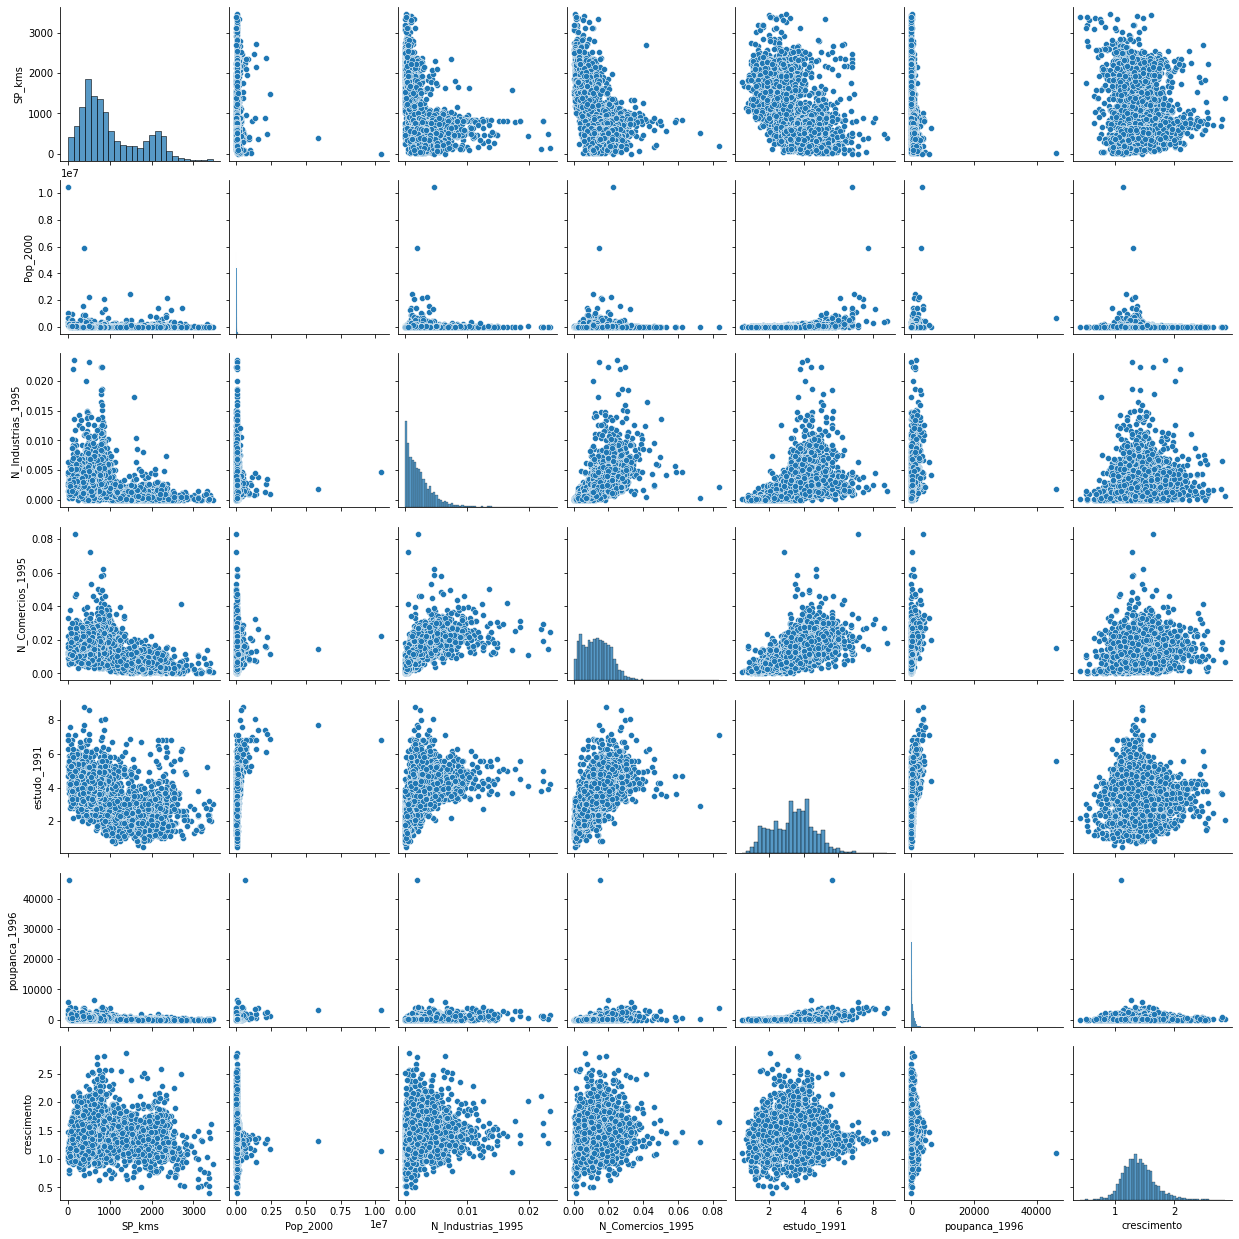

In [4]:
sns.pairplot(base)

<AxesSubplot:>

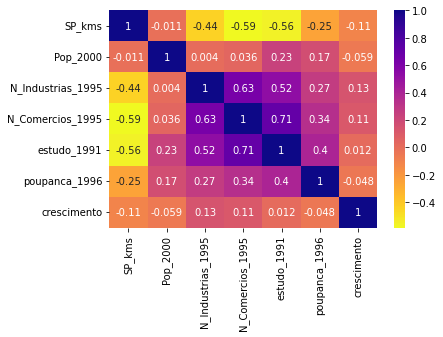

In [5]:
sns.heatmap(base.corr(),cmap='plasma_r',annot=True) 

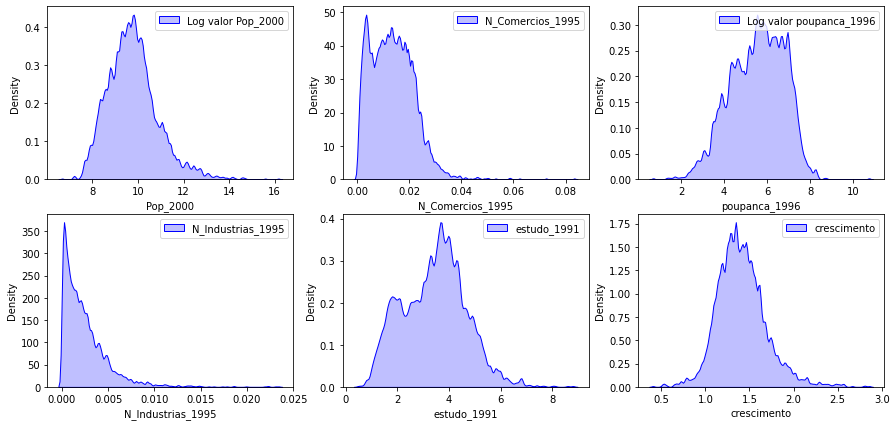

In [6]:
base.describe()

fig, ax= plt.subplots(2,3,figsize=(15, 7))

a=0
b=0
for coluna in base.columns[3:]:
    print(coluna)
    valor=base[coluna]
    legenda=coluna
    if coluna == "Pop_2000" or coluna == "poupanca_1996":
        valor=np.log(valor)
        legenda = f"Log valor {coluna}"
    sns.kdeplot(valor,shade=True,bw=0.05,color='blue',ax=ax[a,b],label=legenda)
    ax[a,b].legend()

    a+=1
    if a==2:
        a=0
        b+=1
clear_output(wait=True)

plt.show()

### Regressão Linear Simples

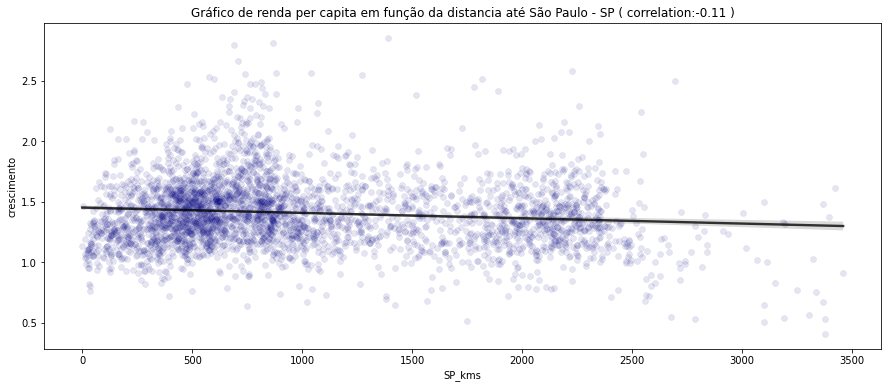

In [7]:
## Nessa parte vamos análisar apenas o fator que queremos estimar: Renda per capita em 2000

# Nessa primeira escolha vamos utilizar como variavel explicativa a distancia do municipio até o municipio de São Paulo

# Plotagem
correlation = base.corr().loc['crescimento','SP_kms']
fig , ax = plt.subplots(figsize=(15,6))
_=sns.regplot(x=(base['SP_kms']),y=base['crescimento'],line_kws={"color":"black","lw":2.4,"alpha":0.78},scatter_kws={'lw':.5,'alpha':.1,'color':'navy'}, ax=ax)
ax.title.set_text(f'Gráfico de renda per capita em função da distancia até São Paulo - SP ( correlation:{correlation:.2f} )')

>>>>> t observado muito baixo, e intervalo de confiança próximo do 0 entretanto com desvio padrão muito baixo que garante que a distancia de um municipio até São Paulo pode impactar na riqueza desse municipio

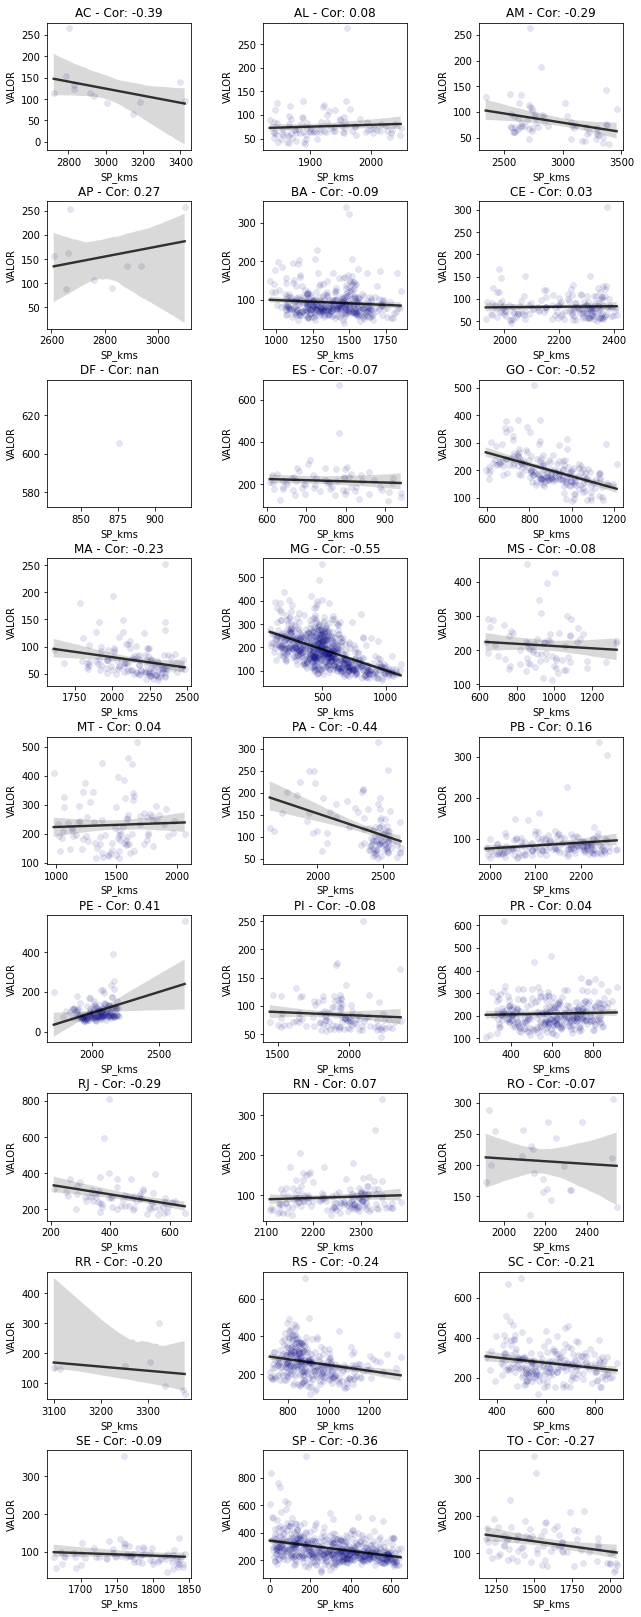

In [ ]:
## Vamos separar agora para uma regressão para cada estado e ver em quais o nosso modelo é mais aplicavel

estados = list(np.unique(base['Estado']))


## Fazendo o plot#
fig,ax = plt.subplots(9,3,figsize=(10,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.92, 
                    wspace=0.5, 
                    hspace=0.4)

a=0
b=0

for estado in estados:

    base2 = base[base['Estado']==estado]
    correlation = base2.corr().loc['VALOR','SP_kms']

    sns.regplot(x=(base2['SP_kms']),y=base2['VALOR'],line_kws={"color":"black","lw":2.4,"alpha":0.78},scatter_kws={'lw':.5,'alpha':.1,'color':'navy'}, ax=ax[a,b])
    ax[a,b].title.set_text(f'{estado} - Cor: {correlation:.2f}')
    
    b+=1
    if b==3:
        b=0
        a+=1
    

In [ ]:
## Vamos fazer o modelo observando apenas em Minas Gerais

base2 = base[base['Estado']=="MG"]

modelo = ols('VALOR ~ SP_kms',data=base2).fit()

print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     312.0
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.73e-58
Time:                        01:43:21   Log-Likelihood:                -3982.4
No. Observations:                 723   AIC:                             7969.
Df Residuals:                     721   BIC:                             7978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    281.5160      5.737     49.072      0.0

>>>>>>>>> Percebemos que o estado em que o modelo parecia mais promissor  o r2 era menos desgradavel isso se deve pois o modelo deveria considerar variaveis dummy, entretanto são 27 estados para fazer isso vamos tentar com apenas com 5 regiões

In [ ]:
## Separando estados
dicio = {'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte',  'AM': 'Norte', 'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste','GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste','RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste','TO': 'Norte'}

base['Região'] = base['Estado'].map(dicio)

dummies = pd.get_dummies(base['Região'])

for i in dummies.columns:
    base[i]=dummies[i]
base = base.rename(columns={'Centro-Oeste':"CenOes"})


## Fazendo regressão com dummies:

modelo = ols('VALOR ~ SP_kms + CenOes + Nordeste + Norte + Sudeste + Sul',data=base).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     913.7
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:44:58   Log-Likelihood:                -25439.
No. Observations:                4491   AIC:                         5.089e+04
Df Residuals:                    4485   BIC:                         5.093e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    196.8409      3.699     53.210      0.0

>>>>>>>>>. Pelo modelo percebemos que realmente em cada região a média é diferente fazendo com que o modelo não seja tão obvio quando olhamos para um grupo especifico e sim quando olhamos para o brasil como um todo

### Regressão Multipla

In [ ]:

## Limpar as variaveis dummies
base=base.iloc[:,0:9]
base['Região'] = base['Estado'].map(dicio)
base.rename(columns={'Renda per capita 1991':"Renda_1991"},inplace=True)



## Montar a regressão com muitas variaveis 
modelo = ols('crescimento ~ SP_kms + Renda_1991 + N_Industrias_1995 + N_Comercios_1995 + estudo_1991',data=base).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            crescimento   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     31.95
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           3.56e-26
Time:                        18:17:54   Log-Likelihood:                -452.70
No. Observations:                3448   AIC:                             915.4
Df Residuals:                    3443   BIC:                             946.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5061      0.02

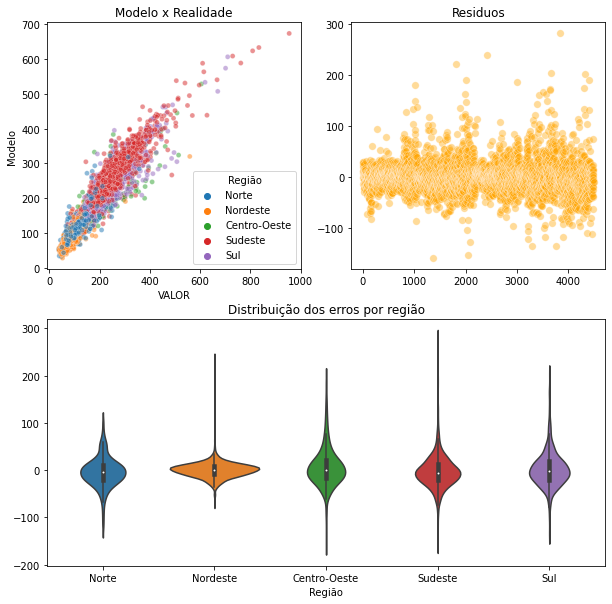

In [ ]:
## Fazer o plot do nosso modelo e comparar com a vida real


#Adiconando o primeiro modelo no dataframe
base['Modelo'] = modelo.fittedvalues

## Fazendo os plots

figura = plt.figure(figsize=(10,10))
gs = figura.add_gridspec(2, 2)

#Plot 1
ax = plt.subplot(gs[0,0]) # row 0, col 0
_=sns.scatterplot(x=base['VALOR'],y=base['Modelo'],hue=base['Região'],s=25,markers=False,alpha=.5, ax=ax)
ax.title.set_text('Modelo x Realidade')

#Plot 2
ax = plt.subplot(gs[0,1]) # row 0, col 0
_=sns.scatterplot(x=range(len(base)),y=modelo.resid,color='orange',s=55,markers=False,alpha=.4, ax=ax)
ax.title.set_text('Residuos')

#Plot 3
ax = plt.subplot(gs[1, :]) # row 0, col 0
_=sns.violinplot(x=base['Região'],y=modelo.resid,s=25,markers=False,alpha=.5, ax=ax)
ax.title.set_text('Distribuição dos erros por região')

In [ ]:
base2 = base[base['Região']=="Nordeste"]


modelo = ols('VALOR ~ SP_kms + Renda_1991 + N_Industrias_1995 + N_Comercios_1995 + estudo_1991',data=base2).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     1408.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:20:29   Log-Likelihood:                -6269.6
No. Observations:                1509   AIC:                         1.255e+04
Df Residuals:                    1503   BIC:                         1.258e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.4317      2.39

In [ ]:
modelo = ols('VALOR ~ SP_kms + Renda_1991 +  N_Comercios_1995 + estudo_1991',data=base2).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALOR   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1761.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        02:20:35   Log-Likelihood:                -6269.8
No. Observations:                1509   AIC:                         1.255e+04
Df Residuals:                    1504   BIC:                         1.258e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           16.6389      2.372  

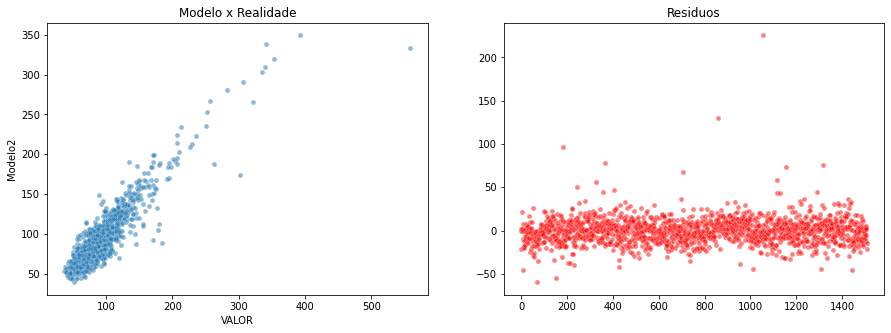

In [ ]:
base2['Modelo2']=modelo.fittedvalues.values

base2['Range'] = np.array(list(range(len(base2))))


fig,ax = plt.subplots(1,2,figsize=(15,5))

_=sns.scatterplot(x=base2['VALOR'],y=base2['Modelo2'],s=25,markers=False,alpha=.5, ax=ax[0])
ax[0].title.set_text("Modelo x Realidade")


_=sns.scatterplot(x=range(len(base2)),y=modelo.resid,s=25,color='red',markers=False,alpha=.5, ax=ax[1])
ax[1].title.set_text("Residuos")

clear_output(wait=True)

plt.show()

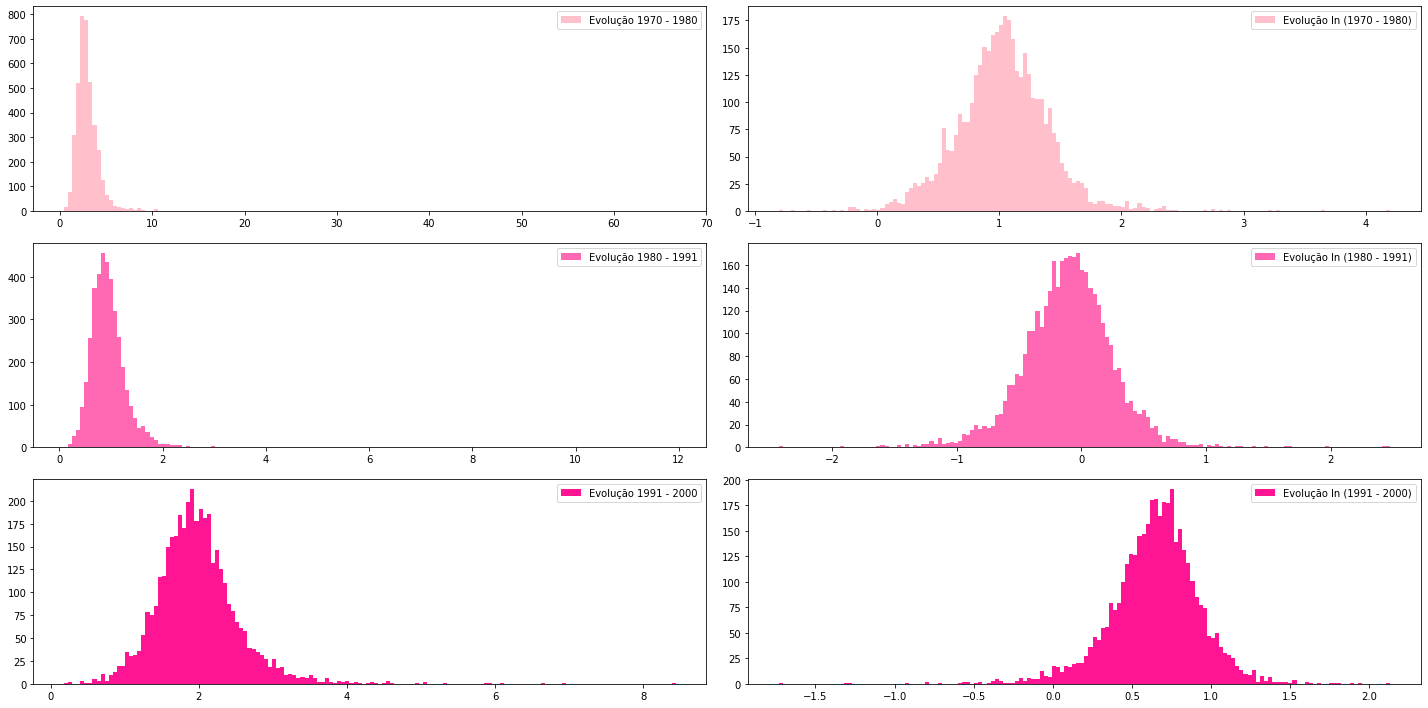

In [ ]:
anos = list(np.unique(base['ANO']))

semi_base = base[base['ANO']==1970][['VALOR']]

semi_base.columns=['1970']

for year in anos[1:]:
  parte = base[base['ANO']==year][['VALOR']]
  parte.rename(columns={'VALOR':str(year)},inplace=True)
  semi_base = pd.merge(semi_base,parte,left_index=True,right_index=True)
  semi_base.dropna(inplace=True)



##  Plotagem

colores = ['pink','hotpink','deeppink']

fig,ax = plt.subplots(3,2,figsize=(20,10))

fig.tight_layout()
for i in range(3):
  semi_base['Evolução'] = semi_base[str(anos[i+1])]/ semi_base[str(anos[i])] 

  ax[i,0].hist(semi_base['Evolução'],bins=150,color=colores[i], label =f'Evolução {anos[i]} - {anos[i+1]}' )
  ax[i,0].legend()
  
  ax[i,1].hist(np.log(semi_base['Evolução']),bins=150,color=colores[i] , label= f'Evolução ln ({anos[i]} - {anos[i+1]})')
  ax[i,1].legend()

A partir desse gráficos, podemos extrair importantes informações sobre o Brasil, dentre elas o crescimento médio dos rendimentos dos municipios brasileiros em cada década. Além disso, percebe-se uma desaceleração desse crescimento na década de 1980, seguida de uma recuperação na década de 1990.

A seguir, aproveitaremos que temos dados de rendimentos totais recebidos por municipio e população local, para adicionar uma importante váriavel ao nosso dataframe: os rendimentos totais per capita. 

In [ ]:
base['value_per_capita'] = base['VALOR']/base['POPULACAO']
base.sample(3)

,ANO,VALOR,Município,LOG_VALOR,Longitude,Latitude,RJ_Distance,POPULACAO,Modelo Valor,value_per_capita
Código,,,,,,,,,,
3513900.0,2000,2789.210515,Divinolândia,7.933514,-46.736870,-21.661622,412.558790,12016.0,-283.907944,0.232125
1500305.0,1970,644.198420,Afuá,6.468007,-50.391428,-0.159172,2646.420658,17826.0,-1000.416470,0.036138
3202108.0,1980,2158.903712,Ecoporanga,7.677356,-40.830081,-18.375252,566.631953,31399.0,7616.036130,0.068757


Agora veremos se há ou não uma relação entre essa nova variavel e a distância do município até ao Rio de Janeiro.

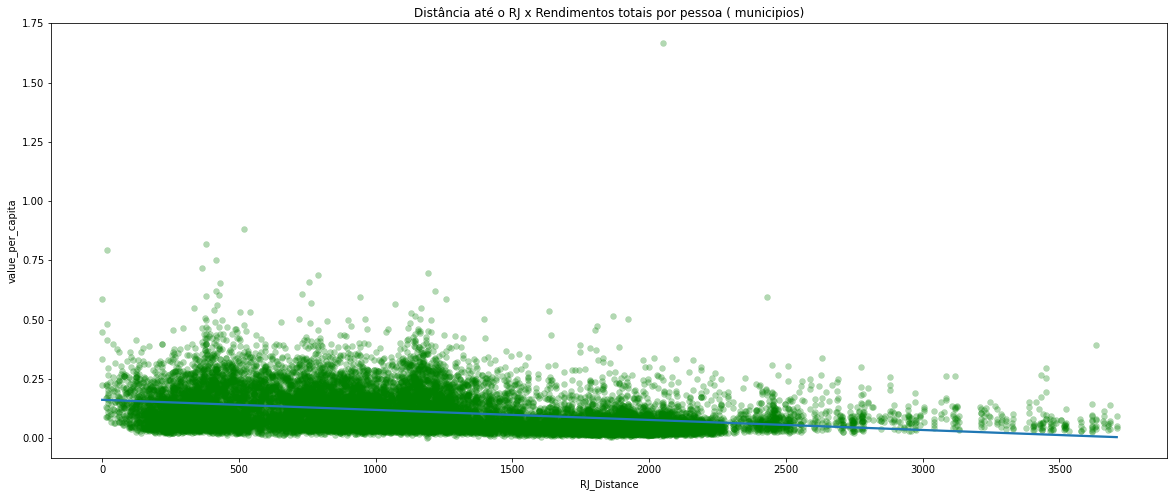

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))
_=sns.regplot(x=base['RJ_Distance'],y=(base['value_per_capita']),scatter_kws={'lw':.3,'alpha':.3,'color':'green'}, ax=ax)
ax.title.set_text('Distância até o RJ x Rendimentos totais por pessoa ( municipios)')

Visualmente, podemos concluir que essa relação é decresente. E para aprofundar a análise, analisaremos na sequência a distribuição dessa nova variável.

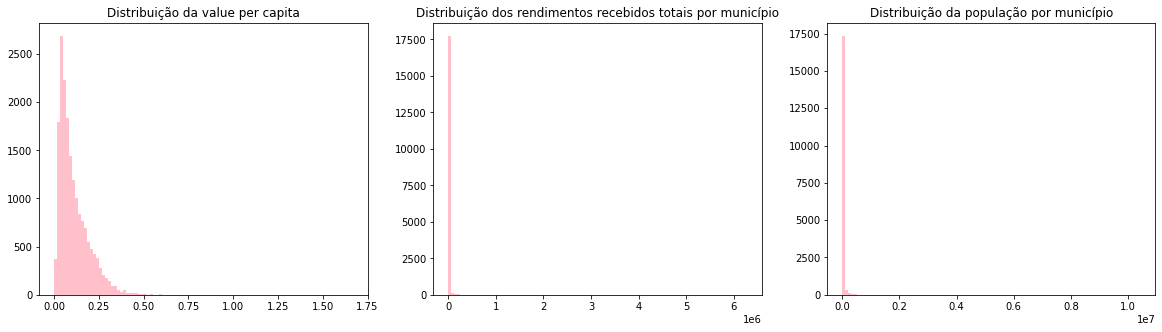

In [ ]:

fig,ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(base['value_per_capita'],bins=100, color='pink')
ax[0].title.set_text('Distribuição da value per capita')

ax[1].hist(base['VALOR'],bins=100, color='pink')
ax[1].title.set_text('Distribuição dos rendimentos recebidos totais por município')

ax[2].hist(base['POPULACAO'],bins=100, color='pink')
ax[2].title.set_text('Distribuição da população por município')

Observa-se que essa nova variável é claramente menos desigual do que as duas anteriores. Agora, veremos se essa nova variável também representa uma distribuição lognormal e faremos o teste de shapiro-wilk em cima disso:

p valor : 0.00013399840099737048


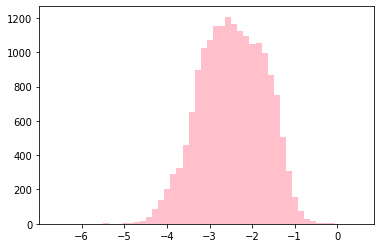

In [ ]:
from scipy.stats import shapiro

distribuicao = np.array(np.log(base['value_per_capita']))
_ = plt.hist(distribuicao,bins=50, color='pink')

##Shapiro da scipy.stats não é muito preciso para N>5000, vamos pegar aleatoriamente 2000 valores e realizar o teste
pvalores = []
for i in range(1000):
  np.random.shuffle(distribuicao)
  np.random.shuffle(distribuicao)
  sta , pvalue_parte = shapiro(distribuicao[:2000])
  pvalores.append(pvalue_parte)
pvalue=max(pvalores)
print(f'p valor : {pvalue}')



A partir do gráfico acima, tem-se a impressão de que a distribuição do log dessa nova variável forma uma distribuição normal mais "gordinha". Entretanto, essa nova variável não representa de fato uma normal, tendo em vista que, memso realizando 1000 testes aleatórios, não conseguimos um p-valor maior do que nenhum alfa imaginável (nem mesmo 0.001).

# Conclusão

A partir desse trabalho, podemos extrair importantes conclusões quanto às formas nas quais as variáveis sociais se relacionam e estão distribuidas. Além disso, é possível ter um panorama geral que engloba, desde a evolução dos rendimentos totais de um município, até o impacto da distância até as grandes capitais nessa váriavel. 

# Referências


*   [IPEA](http://www.ipeadata.gov.br/Default.aspx)



*   [IBGE](https://groups.google.com/g/qgisbrasil/c/0kJDo2KH0is?pli=1 )

